In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
                                                                                                                                                                                                          import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import time
import random
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)
tensorflow.random.set_seed(0)

from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, GlobalMaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import optimizers, losses, activations, models
from keras import applications
from random import shuffle

# **Data Scrape**

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''from bing_image_downloader import downloader
creator_list = ['Angelina Jolie', 'Brad Pitt', 'Bhuvan Bam', 'Denzel Washington', 'Hrithik Roshan', 
               'Jennifer Lawrence', 'Kate Winslet', 'Leonardo DiCaprio', 'Megan Fox', 'Natalie Portman',
               'Robert Downey Jr', 'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks']
for creator in creator_list:
  downloader.download(str(creator) + " digital content creator", limit=1                                                              00,  output_dir='/content/drive/My Drive/ANN Project/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)'''

[%] Downloading Images to /content/drive/My Drive/ANN Project/dataset/Carry Minati digital content creator


[!!]Indexing page: 1

[%] Indexed 18 Images on Page 1.


[%] Downloading Image #1 from https://www.socialketchup.in/wp-content/uploads/2020/07/carry-minati-2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://1.bp.blogspot.com/-fuNoKa6uMNc/YLES96FWBaI/AAAAAAAA1DI/hkO-11F0A1MfHqYv-TO9Brr1knh-G3wygCLcBGAsYHQ/s768/Carry-Minati.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://images-na.ssl-images-amazon.com/images/I/91eE-4jOJ7L.png
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/VOooSWF6Uws/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ytimg.com/vi/o-Mgyh2Zg3s/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://jakhunews.com/wp-content/uploads/2020/08/Carry-Minati-Personal-Information-1024x576.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.ytim

KeyboardInterrupt: ignored

In [ ]:
path = '/content/drive/MyDrive/ANN Project/FINAL DATASET'

In [ ]:
n,m = 256,256

# **RGB**

In [ ]:
class_names = ['Angelina Jolie', 'Brad Pitt', 'Bhuvan Bam', 'Denzel Washington', 'Hrithik Roshan', 
               'Jennifer Lawrence', 'Kate Winslet', 'Leonardo DiCaprio', 'Megan Fox', 'Natalie Portman',
               'Robert Downey Jr', 'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks']

In [ ]:
data_color = []
Y_og = []
for i in class_names:
  new_path = path + "/" + str(i)
  print(new_path)
  for img in os.listdir(new_path):
    #print(os.path.join(new_path,img))
    img = cv2.imread(os.path.join(new_path, img)) # Read the image
    if img is not None:
      color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      resize_img = cv2.resize(color_img, (256,256)) # Resize to 256x256
      data_color.append(resize_img)
      Y_og.append(i)

/content/drive/MyDrive/ANN Project/FINAL DATASET/Angelina Jolie
/content/drive/MyDrive/ANN Project/FINAL DATASET/Brad Pitt
/content/drive/MyDrive/ANN Project/FINAL DATASET/Bhuvan Bam
/content/drive/MyDrive/ANN Project/FINAL DATASET/Denzel Washington
/content/drive/MyDrive/ANN Project/FINAL DATASET/Hrithik Roshan
/content/drive/MyDrive/ANN Project/FINAL DATASET/Jennifer Lawrence
/content/drive/MyDrive/ANN Project/FINAL DATASET/Kate Winslet
/content/drive/MyDrive/ANN Project/FINAL DATASET/Leonardo DiCaprio
/content/drive/MyDrive/ANN Project/FINAL DATASET/Megan Fox
/content/drive/MyDrive/ANN Project/FINAL DATASET/Natalie Portman
/content/drive/MyDrive/ANN Project/FINAL DATASET/Robert Downey Jr
/content/drive/MyDrive/ANN Project/FINAL DATASET/Sandra Bullock
/content/drive/MyDrive/ANN Project/FINAL DATASET/Scarlett Johansson
/content/drive/MyDrive/ANN Project/FINAL DATASET/Tom Cruise
/content/drive/MyDrive/ANN Project/FINAL DATASET/Tom Hanks


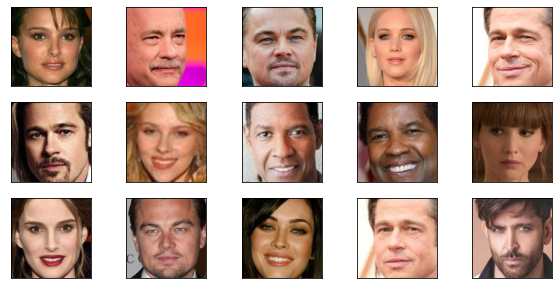

In [ ]:
fig = plt.figure(figsize=(10,5))
r = random.sample(data_color, 15)
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(r[i])

In [ ]:
pd.value_counts(Y_og)

Brad Pitt             110
Angelina Jolie        100
Jennifer Lawrence     100
Leonardo DiCaprio     100
Megan Fox             100
Natalie Portman       100
Sandra Bullock        100
Scarlett Johansson    100
Tom Cruise            100
Tom Hanks             100
Robert Downey Jr       98
Kate Winslet           93
Denzel Washington      91
Hrithik Roshan         85
Bhuvan Bam             82
dtype: int64

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Y_le = le.fit_transform(Y_og)

In [ ]:
X = np.array(data_color)
Y = np.array(Y_le)
X.shape, Y.shape

((1459, 256, 256, 3), (1459,))

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify = Y)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((1167, 256, 256, 3), (1167,), (292, 256, 256, 3), (292,))

In [ ]:
Y_train_cat = to_categorical(Y_train)
Y_val_cat = to_categorical(Y_val)
Y_train_cat.shape, Y_val_cat.shape

((1167, 15), (292, 15))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
# mark loaded layers as not trainable
for layer in base_model.layers:
	layer.trainable = False

vgg16 = models.Sequential([
    base_model,
    
    Flatten(),    
    Dense(256,activation="relu"),
    BatchNormalization(),
    #Dropout(0.5),
    Dense(15, activation='softmax')
])

In [ ]:
vgg16.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_26 (Dense)            (None, 256)               8388864   
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_27 (Dense)            (None, 15)                3855      
                                                                 
Total params: 23,108,431
Trainable params: 8,393,231
Non-trainable params: 14,715,200
__________________________________

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', 
                              mode='min', 
                              verbose=1, 
                              patience=15
                             )
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/ANN Project/Models/vgg16.hdf5", 
                               verbose=1, 
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )
callbacks = [checkpointer, earlystopping, reduce_lr]

In [ ]:
# Configure the model for training
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]

vgg16.compile(loss = tf.losses.CategoricalCrossentropy(),
              optimizer = 'adam',
              metrics=METRICS)

In [ ]:
# Training model
training_start = time.time()

vgg16_history = vgg16.fit(X_train,Y_train_cat,
                          batch_size=16,
                          verbose=True,
                          validation_data=(X_val, Y_val_cat), 
                          callbacks=callbacks, 
                          epochs=5)

training_stop = time.time()
vgg16_training_time = training_stop - training_start
print(f"Training time: {vgg16_training_time}")

Epoch 1/10
73/73 [==============================] - ETA: 0s - loss: 0.7549 - acc: 0.7772 - auc: 0.9712 
Epoch 1: val_loss improved from inf to 1.02671, saving model to /content/drive/My Drive/ANN Project/Models/vgg16.hdf5
73/73 [==============================] - 1008s 14s/step - loss: 0.7549 - acc: 0.7772 - auc: 0.9712 - val_loss: 1.0267 - val_acc: 0.7432 - val_auc: 0.9584 - lr: 0.0010
Epoch 2/10
73/73 [==============================] - ETA: 0s - loss: 0.0711 - acc: 0.9846 - auc: 0.9999 
Epoch 2: val_loss improved from 1.02671 to 0.45040, saving model to /content/drive/My Drive/ANN Project/Models/vgg16.hdf5
73/73 [==============================] - 1003s 14s/step - loss: 0.0711 - acc: 0.9846 - auc: 0.9999 - val_loss: 0.4504 - val_acc: 0.8527 - val_auc: 0.9879 - lr: 0.0010
Epoch 3/10
73/73 [==============================] - ETA: 0s - loss: 0.0178 - acc: 1.0000 - auc: 1.0000 
Epoch 3: val_loss improved from 0.45040 to 0.43435, saving model to /content/drive/My Drive/ANN Project/Models/vgg

In [ ]:
predict_vgg = vgg16.predict(X_val)

10/10 [==============================] - 199s 20s/step


In [ ]:
pred_vgg = [np.argmax(predict_vgg[i], axis = -1) for i in range(X_val.shape[0])]

#### Metrics

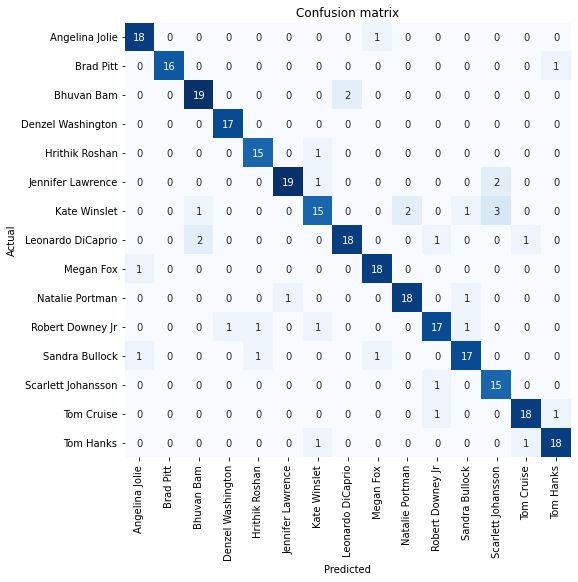

In [ ]:
cm = confusion_matrix(pred_vgg, Y_val)

classnames = class_names
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Y_val_inv = le.inverse_transform(Y_val)
pred_vgg_inv = le.inverse_transform(pred_vgg)

In [ ]:
print(classification_report(Y_val_inv, pred_vgg_inv))

                    precision    recall  f1-score   support

    Angelina Jolie       0.95      0.90      0.92        20
        Bhuvan Bam       0.94      1.00      0.97        16
         Brad Pitt       0.90      0.86      0.88        22
 Denzel Washington       1.00      0.94      0.97        18
    Hrithik Roshan       0.94      0.88      0.91        17
 Jennifer Lawrence       0.86      0.95      0.90        20
      Kate Winslet       0.68      0.79      0.73        19
 Leonardo DiCaprio       0.82      0.90      0.86        20
         Megan Fox       0.95      0.90      0.92        20
   Natalie Portman       0.90      0.90      0.90        20
  Robert Downey Jr       0.81      0.85      0.83        20
    Sandra Bullock       0.85      0.85      0.85        20
Scarlett Johansson       0.94      0.75      0.83        20
        Tom Cruise       0.90      0.90      0.90        20
         Tom Hanks       0.90      0.90      0.90        20

          accuracy                    

In [ ]:
# accuracy: (tp + tn) / (p + n)
vgg_acc = accuracy_score(Y_val, pred_vgg)
print('Accuracy: %f' % vgg_acc)
# precision tp / (tp + fp)
vgg_precision = precision_score(Y_val, pred_vgg, average = 'weighted')
print('Precision: %f' % vgg_precision)
# recall: tp / (tp + fn)
vgg_recall = recall_score(Y_val, pred_vgg, average = 'weighted')
print('Recall: %f' % vgg_recall)
# f1: 2 tp / (2 tp + fp + fn)
vgg_f1 = f1_score(Y_val, pred_vgg, average = 'weighted')
print('F1 score: %f' % vgg_f1)

Accuracy: 0.883562
Precision: 0.888107
Recall: 0.883562
F1 score: 0.884291


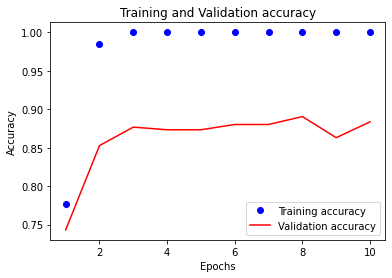

In [ ]:
acc = vgg16_history.history["acc"]
val_acc = vgg16_history.history["val_acc"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

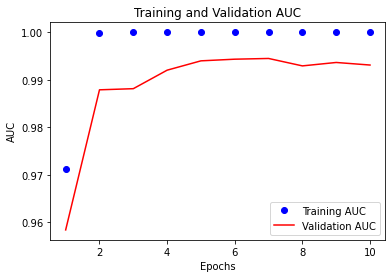

In [ ]:
acc = vgg16_history.history["auc"]
val_acc = vgg16_history.history["val_auc"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training AUC")
plt.plot(epochs, val_acc, "r", label="Validation AUC")
plt.title("Training and Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()
plt.show()

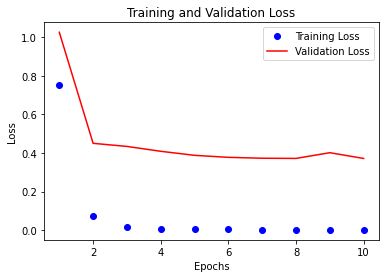

In [ ]:
acc = vgg16_history.history["loss"]
val_acc = vgg16_history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training Loss")
plt.plot(epochs, val_acc, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **B&W**

## **Data Pre-processing**

In [ ]:
data = []
Y_og = []
for i in class_names:
  new_path = path + "/" + str(i)
  print(new_path)
  for img in os.listdir(new_path):
    #print(os.path.join(new_path,img))
    img = cv2.imread(os.path.join(new_path,img))
    if img is not None:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to gray image
        resize_img = cv2.resize(gray_img, (n,m)) # Resize to 256x256
        data.append(resize_img)
        Y_og.append(i)

/content/drive/MyDrive/ANN Project/FINAL DATASET/Angelina Jolie
/content/drive/MyDrive/ANN Project/FINAL DATASET/Brad Pitt
/content/drive/MyDrive/ANN Project/FINAL DATASET/Bhuvan Bam
/content/drive/MyDrive/ANN Project/FINAL DATASET/Denzel Washington
/content/drive/MyDrive/ANN Project/FINAL DATASET/Hrithik Roshan
/content/drive/MyDrive/ANN Project/FINAL DATASET/Jennifer Lawrence
/content/drive/MyDrive/ANN Project/FINAL DATASET/Kate Winslet
/content/drive/MyDrive/ANN Project/FINAL DATASET/Leonardo DiCaprio
/content/drive/MyDrive/ANN Project/FINAL DATASET/Megan Fox
/content/drive/MyDrive/ANN Project/FINAL DATASET/Natalie Portman
/content/drive/MyDrive/ANN Project/FINAL DATASET/Robert Downey Jr
/content/drive/MyDrive/ANN Project/FINAL DATASET/Sandra Bullock
/content/drive/MyDrive/ANN Project/FINAL DATASET/Scarlett Johansson
/content/drive/MyDrive/ANN Project/FINAL DATASET/Tom Cruise
/content/drive/MyDrive/ANN Project/FINAL DATASET/Tom Hanks


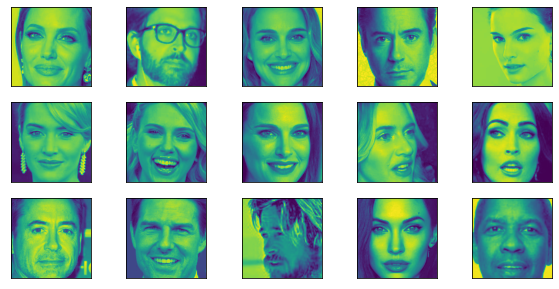

In [ ]:
fig = plt.figure(figsize=(10,5))
r = random.sample(data, 15)
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(r[i])

In [ ]:
le = preprocessing.LabelEncoder()
Y_le = le.fit_transform(Y_og)

Y_le.shape

(1459,)

In [ ]:
X = np.array(data)
X = X.reshape(X.shape[0],n*m)
X = X/255.0
Y = np.array(Y_le).flatten()
X.shape, len(Y)

((1459, 65536), 1459)

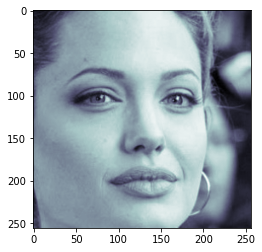

In [ ]:
plt.imshow(X[0].reshape(m,n), cmap=plt.cm.bone)

## **ANN**

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((1167, 65536), (292, 65536), (1167,), (292,))

In [ ]:
Y_train_cat = to_categorical(Y_train)
Y_train_cat.shape, X_train.shape

((1167, 15), (1167, 65536))

In [ ]:
NN = models.Sequential()
NN.add(layers.Dense(1024, activation = 'relu', input_shape = (X_train.shape[1],)))
NN.add(layers.Dense(512, activation = 'relu'))
NN.add(layers.Dense(256, activation = 'relu'))
NN.add(layers.Dense(15, activation = 'Softmax'))

In [ ]:
NN.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1024)              67109888  
                                                                 
 dense_29 (Dense)            (None, 512)               524800    
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 dense_31 (Dense)            (None, 15)                3855      
                                                                 
Total params: 67,769,871
Trainable params: 67,769,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
start = time.time()
ann_hist = NN.fit(X_train, Y_train_cat, validation_split = 0.2, epochs = 50, batch_size=15)
nn_time = time.time() - start

Epoch 1/50
63/63 [==============================] - 58s 875ms/step - loss: 49.8881 - accuracy: 0.0665 - val_loss: 4.5905 - val_accuracy: 0.0385
Epoch 2/50
63/63 [==============================] - 37s 581ms/step - loss: 3.0068 - accuracy: 0.0622 - val_loss: 2.7085 - val_accuracy: 0.0513
Epoch 3/50
63/63 [==============================] - 36s 571ms/step - loss: 2.7240 - accuracy: 0.0697 - val_loss: 2.7082 - val_accuracy: 0.0769
Epoch 4/50
63/63 [==============================] - 37s 581ms/step - loss: 2.7082 - accuracy: 0.0772 - val_loss: 2.7077 - val_accuracy: 0.0769
Epoch 5/50
63/63 [==============================] - 36s 570ms/step - loss: 2.7073 - accuracy: 0.0729 - val_loss: 2.7079 - val_accuracy: 0.0769
Epoch 6/50
63/63 [==============================] - 37s 592ms/step - loss: 2.7068 - accuracy: 0.0750 - val_loss: 2.7078 - val_accuracy: 0.0769
Epoch 7/50
63/63 [==============================] - 39s 627ms/step - loss: 2.7062 - accuracy: 0.0665 - val_loss: 2.7071 - val_accuracy: 0.076

In [ ]:
pred_nn = NN.predict(X_val)

10/10 [==============================] - 1s 112ms/step


In [ ]:
predict_nn = [np.argmax(pred_nn[i], axis = -1) for i in range(X_val.shape[0])]

#### Metrics

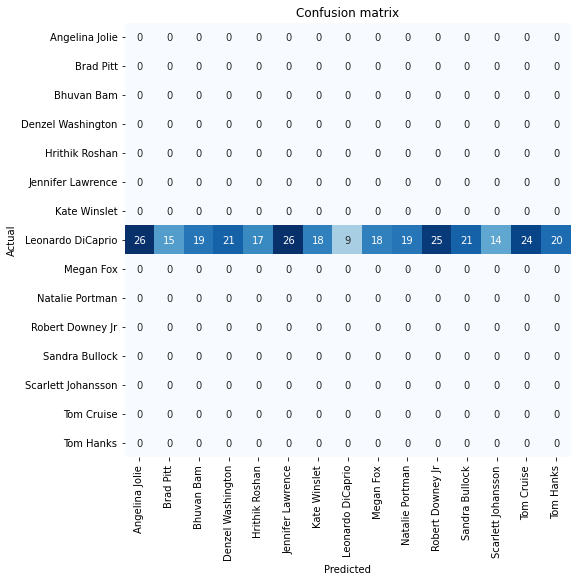

In [ ]:
cm = confusion_matrix(predict_nn, Y_val)

classnames = class_names
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Y_val_inv = le.inverse_transform(Y_val)
predict_nn_inv = le.inverse_transform(predict_nn)

In [ ]:
print(classification_report(Y_val_inv, predict_nn_inv))

                    precision    recall  f1-score   support

    Angelina Jolie       0.00      0.00      0.00        26
        Bhuvan Bam       0.00      0.00      0.00        15
         Brad Pitt       0.00      0.00      0.00        19
 Denzel Washington       0.00      0.00      0.00        21
    Hrithik Roshan       0.00      0.00      0.00        17
 Jennifer Lawrence       0.00      0.00      0.00        26
      Kate Winslet       0.00      0.00      0.00        18
 Leonardo DiCaprio       0.03      1.00      0.06         9
         Megan Fox       0.00      0.00      0.00        18
   Natalie Portman       0.00      0.00      0.00        19
  Robert Downey Jr       0.00      0.00      0.00        25
    Sandra Bullock       0.00      0.00      0.00        21
Scarlett Johansson       0.00      0.00      0.00        14
        Tom Cruise       0.00      0.00      0.00        24
         Tom Hanks       0.00      0.00      0.00        20

          accuracy                    

In [ ]:
Y_val_cat = to_categorical(Y_val)

In [ ]:
loss, acc = NN.evaluate(X_val, Y_val_cat)
print(f'ACCURACY : {acc}, \nLOSS : {loss}')

10/10 [==============================] - 1s 114ms/step - loss: 2.7221 - accuracy: 0.0308
ACCURACY : 0.030821917578577995, 
LOSS : 2.7221059799194336


In [ ]:
# accuracy: (tp + tn) / (p + n)
ann_acc = accuracy_score(Y_val, predict_nn)
print('Accuracy: %f' % ann_acc)
# precision tp / (tp + fp)
ann_precision = precision_score(Y_val, predict_nn, average = 'weighted')
print('Precision: %f' % ann_precision)
# recall: tp / (tp + fn)
ann_recall = recall_score(Y_val, predict_nn, average = 'weighted')
print('Recall: %f' % ann_recall)
# f1: 2 tp / (2 tp + fp + fn)
ann_f1 = f1_score(Y_val, predict_nn, average = 'weighted')
print('F1 score: %f' % ann_f1)

Accuracy: 0.030822
Precision: 0.000950
Recall: 0.030822
F1 score: 0.001843


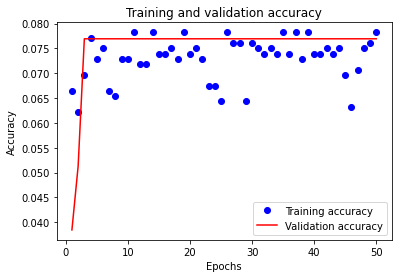

In [ ]:
acc = ann_hist.history["accuracy"]
val_acc = ann_hist.history["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

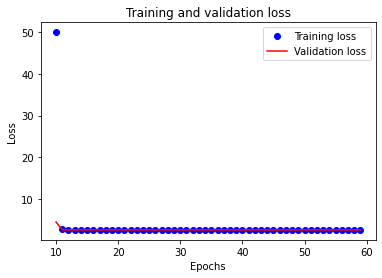

In [ ]:
loss = ann_hist.history["loss"]
val_loss = ann_hist.history["val_loss"]
epochs = range(10, len(loss) + 10)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## **PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def evaluate(components, eigenValues, eigenVectors, df):
    weightage = {}
    
    col = ['PC'+ str(i+1) for i in range(components.shape[1])]
    transform = pd.DataFrame(components, columns = col)
    #display(transform)
    
    var = eigenValues/sum(eigenValues)
    for i in range(1,len(var)+1):
        if sum(var[:i])>=0.9:
            no_of_pc = i
            break
    print(f'\n{no_of_pc} components explains 90% or more variability')
    
    for i in range(no_of_pc):
        top_n = np.argsort( abs(eigenVectors[i]) )[::-1][:4] # shows top 4 affecting features
        weightage['PC'+str(i+1)] = [str(round(abs(eigenVectors[i][j]),4)) for j in top_n]
    
    impact = pd.DataFrame.from_dict(weightage, orient='index')
    impact['Eigen Values'] = eigenValues[:no_of_pc]
    impact['Variability (%)'] = var[:no_of_pc]
    impact['Cummulative Variability (%)'] = [sum(var[:i]) for i in range(1,no_of_pc+1)]
    #display(impact)
    return transform, impact, no_of_pc

In [ ]:
def PCA_lib(df):
    pca = PCA()
    pca.fit(df)
    eigenVectors = pca.components_.T
    eigenValues = pca.explained_variance_
    components = pca.transform(df)
    return pca, components, eigenValues, eigenVectors

In [ ]:
pca, components, eigenValues, eigenVectors = PCA_lib(X)

In [ ]:
X_pca, impact, no_of_pc = evaluate(components, eigenValues, eigenVectors, X)


122 components explains 90% or more variability


In [ ]:
X.shape, X_pca.shape, Y.shape

((1459, 65536), (1459, 1459), (1459,))

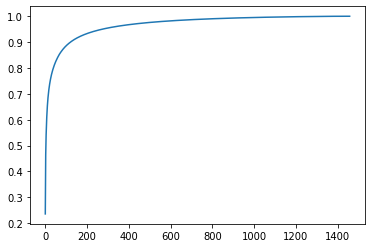

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

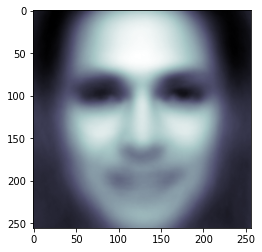

In [ ]:
plt.imshow(pca.mean_.reshape(m,n),cmap=plt.cm.bone)

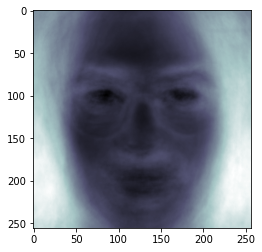

In [ ]:
plt.imshow(eigenVectors.T[0].reshape(m,n),cmap=plt.cm.bone)

## **PCA+ANN**

In [ ]:
X_pca_train, X_pca_val, Y_train, Y_val = train_test_split(X_pca, Y, test_size = 0.2, random_state = 0) 
X_pca_train.shape, X_pca_val.shape, Y_train.shape, Y_val.shape

((1167, 1459), (292, 1459), (1167,), (292,))

In [ ]:
Y_train_cat = to_categorical(Y_train)
Y_train_cat.shape, X_pca_train.shape

((1167, 15), (1167, 1459))

In [ ]:
NN_pca = models.Sequential()
NN_pca.add(layers.Dense(1024, activation = 'relu', input_shape = (X_pca_train.shape[1],)))
NN_pca.add(layers.Dense(512, activation = 'relu'))
NN_pca.add(layers.Dense(256, activation = 'relu'))
NN_pca.add(layers.Dense(15, activation = 'Softmax'))

In [ ]:
NN_pca.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1024)              1495040   
                                                                 
 dense_33 (Dense)            (None, 512)               524800    
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dense_35 (Dense)            (None, 15)                3855      
                                                                 
Total params: 2,155,023
Trainable params: 2,155,023
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN_pca.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
start = time.time()
ann_pca_hist = NN_pca.fit(X_pca_train, Y_train_cat, validation_split = 0.2, epochs = 50, batch_size=15)
nn_pca_time = time.time()-start

Epoch 1/50
63/63 [==============================] - 5s 48ms/step - loss: 2.4144 - accuracy: 0.2905 - val_loss: 2.2728 - val_accuracy: 0.2863
Epoch 2/50
63/63 [==============================] - 2s 37ms/step - loss: 0.6731 - accuracy: 0.8060 - val_loss: 1.6468 - val_accuracy: 0.5556
Epoch 3/50
63/63 [==============================] - 2s 26ms/step - loss: 0.1467 - accuracy: 0.9593 - val_loss: 3.2498 - val_accuracy: 0.4188
Epoch 4/50
63/63 [==============================] - 2s 26ms/step - loss: 0.0542 - accuracy: 0.9818 - val_loss: 2.8526 - val_accuracy: 0.5299
Epoch 5/50
63/63 [==============================] - 2s 26ms/step - loss: 0.0545 - accuracy: 0.9893 - val_loss: 2.8586 - val_accuracy: 0.5470
Epoch 6/50
63/63 [==============================] - 2s 25ms/step - loss: 0.0672 - accuracy: 0.9839 - val_loss: 3.6816 - val_accuracy: 0.5342
Epoch 7/50
63/63 [==============================] - 2s 25ms/step - loss: 0.0595 - accuracy: 0.9871 - val_loss: 3.1369 - val_accuracy: 0.5684
Epoch 8/50
63

In [ ]:
pred_nn_pca = NN_pca.predict(X_pca_val)

10/10 [==============================] - 0s 8ms/step


In [ ]:
predict_nn_pca = [np.argmax(pred_nn_pca[i], axis = -1) for i in range(X_pca_val.shape[0])]

#### Metrics

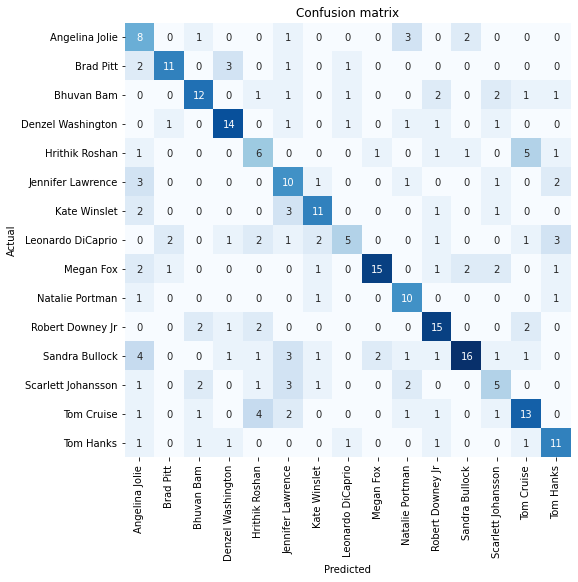

In [ ]:
cm = confusion_matrix(predict_nn_pca, Y_val)

classnames = class_names
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Y_val_inv = le.inverse_transform(Y_val)
predict_nn_pca_inv = le.inverse_transform(predict_nn_pca)

In [ ]:
print(classification_report(Y_val_inv, predict_nn_pca_inv))

                    precision    recall  f1-score   support

    Angelina Jolie       0.53      0.31      0.39        26
        Bhuvan Bam       0.61      0.73      0.67        15
         Brad Pitt       0.57      0.63      0.60        19
 Denzel Washington       0.70      0.67      0.68        21
    Hrithik Roshan       0.38      0.35      0.36        17
 Jennifer Lawrence       0.56      0.38      0.45        26
      Kate Winslet       0.61      0.61      0.61        18
 Leonardo DiCaprio       0.28      0.56      0.37         9
         Megan Fox       0.60      0.83      0.70        18
   Natalie Portman       0.77      0.53      0.62        19
  Robert Downey Jr       0.68      0.60      0.64        25
    Sandra Bullock       0.50      0.76      0.60        21
Scarlett Johansson       0.33      0.36      0.34        14
        Tom Cruise       0.54      0.54      0.54        24
         Tom Hanks       0.65      0.55      0.59        20

          accuracy                    

In [ ]:
Y_val_cat = to_categorical(Y_val)

In [ ]:
loss_pca, acc_pca = NN_pca.evaluate(X_pca_val, Y_val_cat)
print(f'ACCURACY : {acc_pca}, \nLOSS : {loss_pca}')

10/10 [==============================] - 0s 8ms/step - loss: 5.6059 - accuracy: 0.5548
ACCURACY : 0.5547945499420166, 
LOSS : 5.605949401855469


In [ ]:
# accuracy: (tp + tn) / (p + n)
ann_pca_acc = accuracy_score(Y_val, predict_nn_pca)
print('Accuracy: %f' % ann_pca_acc)
# precision tp / (tp + fp)
ann_pca_precision = precision_score(Y_val, predict_nn_pca, average = 'weighted')
print('Precision: %f' % ann_pca_precision)
# recall: tp / (tp + fn)
ann_pca_recall = recall_score(Y_val, predict_nn_pca, average = 'weighted')
print('Recall: %f' % ann_pca_recall)
# f1: 2 tp / (2 tp + fp + fn)
ann_pca_f1 = f1_score(Y_val, predict_nn_pca, average = 'weighted')
print('F1 score: %f' % ann_pca_f1)

Accuracy: 0.554795
Precision: 0.570132
Recall: 0.554795
F1 score: 0.551406


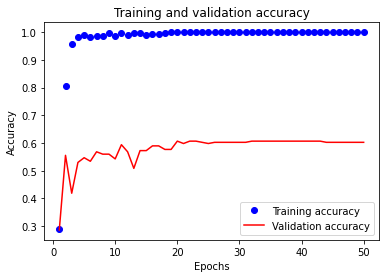

In [ ]:
acc = ann_pca_hist.history["accuracy"]
val_acc = ann_pca_hist.history["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

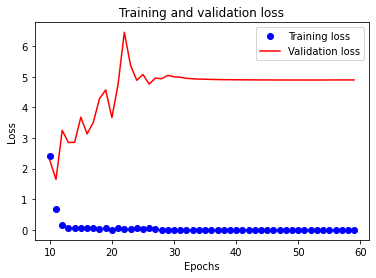

In [ ]:
loss = ann_pca_hist.history["loss"]
val_loss = ann_pca_hist.history["val_loss"]
epochs = range(10, len(loss) + 10)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## **PCA+KNN**

In [ ]:
#Import svm model
from sklearn.neighbors import KNeighborsClassifier

#Create a knn Classifier
start = time.time()
knn_pca = KNeighborsClassifier()
knn_pca_time = time.time()-start

#Train the model using the training sets
knn_pca.fit(X_pca_train, Y_train)

#Predict the response for test dataset
y_pred_knn_pca = knn_pca.predict(X_pca_val)

#### Metrics

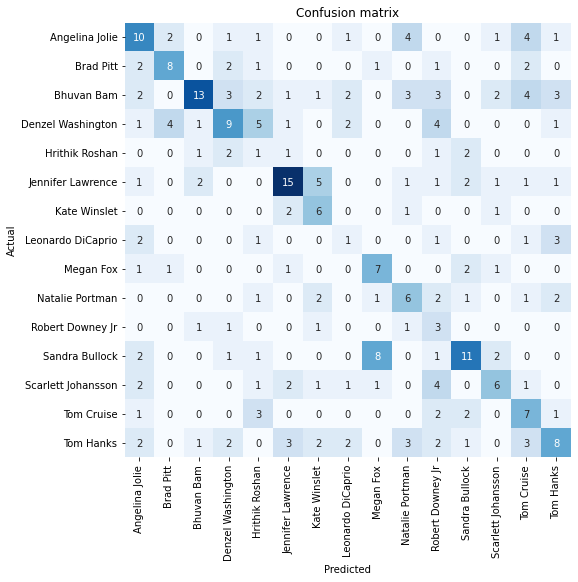

In [ ]:
cm = confusion_matrix(y_pred_knn_pca, Y_val)

classnames = class_names
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Y_val_inv = le.inverse_transform(Y_val)
y_pred_knn_pca_inv = le.inverse_transform(y_pred_knn_pca)

In [ ]:
print(classification_report(Y_val_inv, y_pred_knn_pca_inv))

                    precision    recall  f1-score   support

    Angelina Jolie       0.40      0.38      0.39        26
        Bhuvan Bam       0.47      0.53      0.50        15
         Brad Pitt       0.33      0.68      0.45        19
 Denzel Washington       0.32      0.43      0.37        21
    Hrithik Roshan       0.12      0.06      0.08        17
 Jennifer Lawrence       0.50      0.58      0.54        26
      Kate Winslet       0.60      0.33      0.43        18
 Leonardo DiCaprio       0.11      0.11      0.11         9
         Megan Fox       0.54      0.39      0.45        18
   Natalie Portman       0.38      0.32      0.34        19
  Robert Downey Jr       0.43      0.12      0.19        25
    Sandra Bullock       0.42      0.52      0.47        21
Scarlett Johansson       0.32      0.43      0.36        14
        Tom Cruise       0.44      0.29      0.35        24
         Tom Hanks       0.28      0.40      0.33        20

          accuracy                    

In [ ]:
# accuracy: (tp + tn) / (p + n)
knn_pca_acc = accuracy_score(Y_val, y_pred_knn_pca)
print('Accuracy: %f' % knn_pca_acc)
# precision tp / (tp + fp)
knn_pca_precision = precision_score(Y_val, y_pred_knn_pca, average = 'weighted')
print('Precision: %f' % knn_pca_precision)
# recall: tp / (tp + fn)
knn_pca_recall = recall_score(Y_val, y_pred_knn_pca, average = 'weighted')
print('Recall: %f' % knn_pca_recall)
# f1: 2 tp / (2 tp + fp + fn)
knn_pca_f1 = f1_score(Y_val, y_pred_knn_pca, average = 'weighted')
print('F1 score: %f' % knn_pca_f1)

Accuracy: 0.380137
Precision: 0.391513
Recall: 0.380137
F1 score: 0.366824


In [ ]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
knn_pca_kfold_acc_train = cross_val_score(knn_pca, X_pca_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
knn_pca_kfold_acc_val = cross_val_score(knn_pca, X_pca_val, Y_val, scoring='accuracy', cv=cv, n_jobs=-1)

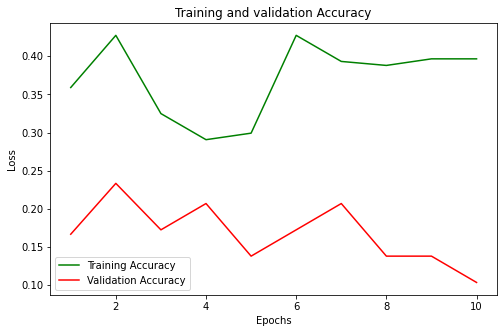

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
degree = [i for i in range(1,11)]
plt.plot(degree, knn_pca_kfold_acc_train, "g", label="Training Accuracy")
plt.plot(degree, knn_pca_kfold_acc_val, "r", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## **PCA+SVM**

In [ ]:
from sklearn.svm import SVC

#Create a svm Classifier
svm_pca = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
start = time.time()
svm_pca.fit(X_pca_train, Y_train)
svm_pca_time = time.time()-start

#Predict the response for test dataset
y_pred_svm_pca = svm_pca.predict(X_pca_val)

#### Metrics

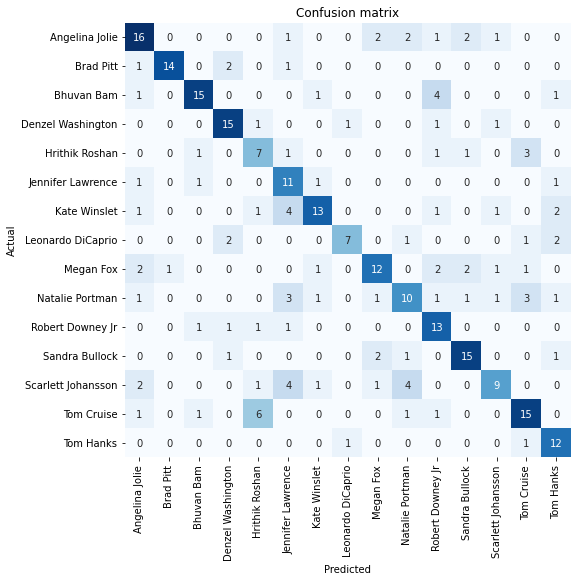

In [ ]:
cm = confusion_matrix(y_pred_svm_pca, Y_val)

classnames = class_names
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Y_val_inv = le.inverse_transform(Y_val)
y_pred_svm_pca_inv = le.inverse_transform(y_pred_svm_pca)

In [ ]:
print(classification_report(Y_val_inv, y_pred_svm_pca_inv))

                    precision    recall  f1-score   support

    Angelina Jolie       0.64      0.62      0.63        26
        Bhuvan Bam       0.78      0.93      0.85        15
         Brad Pitt       0.68      0.79      0.73        19
 Denzel Washington       0.79      0.71      0.75        21
    Hrithik Roshan       0.50      0.41      0.45        17
 Jennifer Lawrence       0.73      0.42      0.54        26
      Kate Winslet       0.57      0.72      0.63        18
 Leonardo DiCaprio       0.54      0.78      0.64         9
         Megan Fox       0.55      0.67      0.60        18
   Natalie Portman       0.43      0.53      0.48        19
  Robert Downey Jr       0.76      0.52      0.62        25
    Sandra Bullock       0.75      0.71      0.73        21
Scarlett Johansson       0.41      0.64      0.50        14
        Tom Cruise       0.60      0.62      0.61        24
         Tom Hanks       0.86      0.60      0.71        20

          accuracy                    

In [ ]:
# accuracy: (tp + tn) / (p + n)
svm_pca_acc = accuracy_score(Y_val, y_pred_svm_pca)
print('Accuracy: %f' % svm_pca_acc)
# precision tp / (tp + fp)
svm_pca_precision = precision_score(Y_val, y_pred_svm_pca, average = 'weighted')
print('Precision: %f' % svm_pca_precision)
# recall: tp / (tp + fn)
svm_pca_recall = recall_score(Y_val, y_pred_svm_pca, average = 'weighted')
print('Recall: %f' % svm_pca_recall)
# f1: 2 tp / (2 tp + fp + fn)
svm_pca_f1 = f1_score(Y_val, y_pred_svm_pca, average = 'weighted')
print('F1 score: %f' % svm_pca_f1)

Accuracy: 0.630137
Precision: 0.652889
Recall: 0.630137
F1 score: 0.630018


In [ ]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
svm_pca_kfold_acc_train = cross_val_score(svm_pca, X_pca_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
svm_pca_kfold_acc_val = cross_val_score(svm_pca, X_pca_val, Y_val, scoring='accuracy', cv=cv, n_jobs=-1)

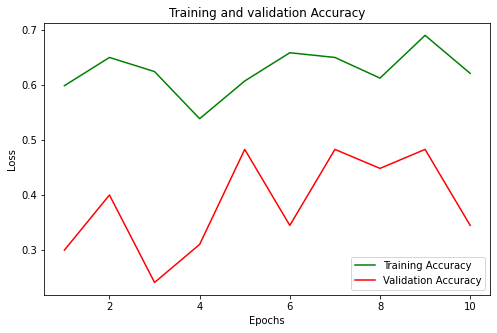

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
degree = [i for i in range(1,11)]
plt.plot(degree, svm_pca_kfold_acc_train, "g", label="Training Accuracy")
plt.plot(degree, svm_pca_kfold_acc_val, "r", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Comparison**

In [ ]:
pd.DataFrame([[ann_acc, ann_precision, ann_recall, ann_f1],
              [ann_pca_acc, ann_pca_precision, ann_pca_recall, ann_pca_f1],
              [knn_pca_acc, knn_pca_precision, knn_pca_recall, knn_pca_f1],
              [svm_pca_acc, svm_pca_precision, svm_pca_recall, svm_pca_f1],
              [vgg_acc, vgg_precision, vgg_recall, vgg_f1]], 
             columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score'], index = ['ANN', 'PCA + ANN', 'PCA + KNN', 'PCA + SVM', 'VGG16'])

,Accuracy,Precision,Recall,F1 Score
ANN,0.030822,0.000950,0.030822,0.001843
PCA + ANN,0.554795,0.570132,0.554795,0.551406
PCA + KNN,0.380137,0.391513,0.380137,0.366824
PCA + SVM,0.630137,0.652889,0.630137,0.630018
VGG16,0.883562,0.888107,0.883562,0.884291
